# Unit 4: Orthogonality, Projections, and Least Squares

In this unit:
1. Orthogonal and orthonormal vectors
1. Orthogonal vector spaces and relations for the fundamental subspaces
1. Grahm-Schmidt
1. QR factorization.
1. Projections
1. Least Squares

Two vectors $u$ and $v$ are said to be **orthogonal** if $u \cdot v = 0$.

In [3]:
using LinearAlgebra
u = [1,1];
v =[-1,1];
u⋅ v, u'v,u'*v,dot(u,v)  #\cdot +[TAB]

(0, 0, 0, 0)

A collection of vectors $\{v_1,\ldots,v_k\}$ is said to be orthogonal if every pair $v_i$ and $v_j$ for $i \neq j$ is orthogonal.

Further the collection is called **orthonormal** if $||v_i|| = 1$ for each $i$.

Hence for an orthonormal collection of vectors,
$$
v_i^Tv_j =
\begin{cases}
1 & i=j \\
0 & i \neq j \\
\end{cases}
$$


Example: The standard $n$-vectors $e_1,\ldots,e_n$ are orthonormal. But we can also rotate them or flip them and still keep orthonormal vectors.

**Claim:** Orthonormal vectors are linearly indepednent (also true for orthogonal vectors).

## Orthogonal Vector Spaces

Vector spaces ${\cal V}$ and ${\cal W}$ are orthogonal if $v^Tw = 0$ for every $v \in {\cal V}$ and $w \in {\cal W}$.

## Gram - Schmidt

(Alg 5.1, pp 97 [VMLS]):

Given $n$-vectors $v_1,\ldots,v_k$, for $i=1,\ldots,k$:

1. Orthogonalization: Set
$$
\tilde{q}_i = v_i - (q_1^T v_i) q_1 - \ldots - (q_{i-1}^T v_i) q_{i-1}
$$

1. If $\tilde{q}_i = 0$ quit saying "linearly dependent".
1. Normalization: Set $q_i = \tilde{q}_i/||\tilde{q}_i||$.

In [2]:
using LinearAlgebra
#warm up implemintation for n=3, k=2
v1 = [1,2,3]
v2 = [0,1,4] #[2,4,6]
#output will be q1 and q2 (or a claim "NOT Linearly Independent")

#Step 1 in iteration i=1
qT = v1 - zeros(3)

#Step 2 qT \neq 0 so won't quit

#step 3
q1 = qT/norm(qT)

#iteration i = 2
#Step 1
qT = v2 - (q1'v2)*q1

#Step 2
#If qT was 0 then quit

#Step 3
q2 = qT/norm(qT)

#output
Q = [q1 q2]

3×2 Array{Float64,2}:
 0.267261  -0.57735
 0.534522  -0.57735
 0.801784   0.57735

In [3]:
norm(Q[:,1])

1.0

In [4]:
norm(Q[:,2])

1.0

In [5]:
Q[:,1]'Q[:,2]

-3.3306690738754696e-16

In [6]:
Q'Q 

2×2 Array{Float64,2}:
  1.0          -3.29667e-16
 -3.29667e-16   1.0

We see that $Q^T Q = I$. So is $Q^{-1} = Q^{T}$? (Only if $k=n$)

**todo**: Implement Gram-Schmidt

In [12]:
sum([])

MethodError: MethodError: no method matching zero(::Type{Any})
Closest candidates are:
  zero(::Type{Union{Missing, T}}) where T at missing.jl:105
  zero(!Matched::Type{Missing}) at missing.jl:103
  zero(!Matched::Type{LibGit2.GitHash}) at /Users/vagrant/worker/juliapro-release-osx1011-0_6/build/tmp_julia/Julia-1.4.app/Contents/Resources/julia/share/julia/stdlib/v1.4/LibGit2/src/oid.jl:220
  ...

In [25]:
function myGramSchmidt(v)
    n = length(v[1])
    k = length(v)
    if norm(v[1]) < 10^-8
        error("linearly dependent")
    end
    q = [v[1]/norm(v[1])] #start with first q 
    for i in 2:k
        qT = v[i] - sum([(q[j]'v[i])*q[j] for j in 1:i-1])
        if norm(qT) < 10^-8 #almost zero 
            error("linearly dependent")
        end
        qi = qT/norm(qT)
        push!(q,qi)
    end
    return q
end

myGramSchmidt (generic function with 1 method)

In [37]:
v1 = [1,2,3,4]
v2 = [-4,0,2,5]
v3 = [2,1,4,2]
#k=n=3
vList = [v1,v2,v3]
qList = myGramSchmidt(vList)

3-element Array{Array{Float64,1},1}:
 [0.18257418583505536, 0.3651483716701107, 0.5477225575051661, 0.7302967433402214]
 [-0.8809855213552419, -0.2729814291523284, -0.03722474033895375, 0.38465565016919023]
 [-0.02369753079705554, -0.5059422825171476, 0.7938672817013798, -0.3365049373181967]

In [38]:
norm.(qList)

3-element Array{Float64,1}:
 0.9999999999999999
 1.0
 0.9999999999999999

In [31]:
qList[2]'qList[3]

1.6653345369377348e-16

In [39]:
Q = hcat(qList...) #hcat(qList[1],qList[2],qList[3])  splat operator

4×3 Array{Float64,2}:
 0.182574  -0.880986   -0.0236975
 0.365148  -0.272981   -0.505942
 0.547723  -0.0372247   0.793867
 0.730297   0.384656   -0.336505

In [40]:
Q'Q

3×3 Array{Float64,2}:
 1.0           2.04527e-16   3.49122e-16
 2.04527e-16   1.0          -5.21202e-16
 3.49122e-16  -5.21202e-16   1.0

In [36]:
inv(Q) - Q'

3×3 Array{Float64,2}:
  1.11022e-16  -3.33067e-16   1.11022e-16
 -1.11022e-16   1.249e-16    -5.55112e-17
  2.77556e-16   1.11022e-16   2.77556e-16

A matrix with orthonormal columns $A$ satisfies,

$$
A^TA = I
$$

This of $A$ as $n \times k$ so the $I$ is $k \times k$.

If $A$ is in addition square then it is called an orthogonal matrix and $A^T = A^{-1}$.

1. $|| A x|| = ||x||$
1. $(Ax)^T(Ay) = x^Ty$
1. $\angle (Ax, Ay) = \angle (x,y)$

## QR Factorization

$$
A = QR
$$

Expresses the "result" of Gram-Schmidt.

In Gram-Schmidt:
$$
q_{i} ||\tilde{q_i}|| = \tilde{q}_i = v_i - (q_1^T v_i) q_1 - \ldots - (q_{i-1}^T v_i) q_{i-1}
$$

Or
$$
v_i = (q_1^T v_i) q_1 + \ldots + (q_{i-1}^T v_i) q_{i-1} + q_{i} ||\tilde{q_i}||
$$
Or
$$
v_i = R_{1i} q_1 + \ldots + R_{ii} q_i
$$
where
$$
R_{ij} = q_i^T v_j
\qquad
\text{for}~~i<j
$$
and
$$
R_{ii} = ||\tilde{q}_i||
$$
and
$$
R_{ij} = 0
\qquad
\text{for}~~i>j
$$
Hence,
$$
A = QR
$$

In [41]:
using LinearAlgebra
A =[1 0 1;
    2 0 1;
    1 1 1;
    2 3 4]
rank(A)

3

In [44]:
[A I]

4×7 Array{Int64,2}:
 1  0  1  1  0  0  0
 2  0  1  0  1  0  0
 1  1  1  0  0  1  0
 2  3  4  0  0  0  1

In [45]:
rank([A I])

4

In [46]:
B = [A I]

4×7 Array{Int64,2}:
 1  0  1  1  0  0  0
 2  0  1  0  1  0  0
 1  1  1  0  0  1  0
 2  3  4  0  0  0  1

In [50]:
myGramSchmidt([B[:,i] for i in 1:(size(B)[2])])

ErrorException: linearly dependent

In [42]:
? qr

search: qr qr! QR QRPivoted sqrt isqrt QuickSort PartialQuickSort



```
qr(A, pivot=Val(false); blocksize) -> F
```

Compute the QR factorization of the matrix `A`: an orthogonal (or unitary if `A` is complex-valued) matrix `Q`, and an upper triangular matrix `R` such that

$$
A = Q R
$$

The returned object `F` stores the factorization in a packed format:

  * if `pivot == Val(true)` then `F` is a [`QRPivoted`](@ref) object,
  * otherwise if the element type of `A` is a BLAS type ([`Float32`](@ref), [`Float64`](@ref), `ComplexF32` or `ComplexF64`), then `F` is a [`QRCompactWY`](@ref) object,
  * otherwise `F` is a [`QR`](@ref) object.

The individual components of the decomposition `F` can be retrieved via property accessors:

  * `F.Q`: the orthogonal/unitary matrix `Q`
  * `F.R`: the upper triangular matrix `R`
  * `F.p`: the permutation vector of the pivot ([`QRPivoted`](@ref) only)
  * `F.P`: the permutation matrix of the pivot ([`QRPivoted`](@ref) only)

Iterating the decomposition produces the components `Q`, `R`, and if extant `p`.

The following functions are available for the `QR` objects: [`inv`](@ref), [`size`](@ref), and [`\`](@ref). When `A` is rectangular, `\` will return a least squares solution and if the solution is not unique, the one with smallest norm is returned. When `A` is not full rank, factorization with (column) pivoting is required to obtain a minimum norm solution.

Multiplication with respect to either full/square or non-full/square `Q` is allowed, i.e. both `F.Q*F.R` and `F.Q*A` are supported. A `Q` matrix can be converted into a regular matrix with [`Matrix`](@ref).  This operation returns the "thin" Q factor, i.e., if `A` is `m`×`n` with `m>=n`, then `Matrix(F.Q)` yields an `m`×`n` matrix with orthonormal columns.  To retrieve the "full" Q factor, an `m`×`m` orthogonal matrix, use `F.Q*Matrix(I,m,m)`.  If `m<=n`, then `Matrix(F.Q)` yields an `m`×`m` orthogonal matrix.

The block size for QR decomposition can be specified by keyword argument `blocksize :: Integer` when `pivot == Val(false)` and `A isa StridedMatrix{<:BlasFloat}`. It is ignored when `blocksize > minimum(size(A))`.  See [`QRCompactWY`](@ref).

!!! compat "Julia 1.4"
    The `blocksize` keyword argument requires Julia 1.4 or later.


# Examples

```jldoctest
julia> A = [3.0 -6.0; 4.0 -8.0; 0.0 1.0]
3×2 Array{Float64,2}:
 3.0  -6.0
 4.0  -8.0
 0.0   1.0

julia> F = qr(A)
LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.6   0.0   0.8
 -0.8   0.0  -0.6
  0.0  -1.0   0.0
R factor:
2×2 Array{Float64,2}:
 -5.0  10.0
  0.0  -1.0

julia> F.Q * F.R == A
true
```

!!! note
    `qr` returns multiple types because LAPACK uses several representations that minimize the memory storage requirements of products of Householder elementary reflectors, so that the `Q` and `R` matrices can be stored compactly rather as two separate dense matrices.


---

```
qr(A) -> QRSparse
```

Compute the `QR` factorization of a sparse matrix `A`. Fill-reducing row and column permutations are used such that `F.R = F.Q'*A[F.prow,F.pcol]`. The main application of this type is to solve least squares or underdetermined problems with [`\`](@ref). The function calls the C library SPQR.

!!! note
    `qr(A::SparseMatrixCSC)` uses the SPQR library that is part of SuiteSparse. As this library only supports sparse matrices with [`Float64`](@ref) or `ComplexF64` elements, as of Julia v1.4 `qr` converts `A` into a copy that is of type `SparseMatrixCSC{Float64}` or `SparseMatrixCSC{ComplexF64}` as appropriate.


# Examples

```jldoctest
julia> A = sparse([1,2,3,4], [1,1,2,2], [1.0,1.0,1.0,1.0])
4×2 SparseMatrixCSC{Float64,Int64} with 4 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  1.0
  [3, 2]  =  1.0
  [4, 2]  =  1.0

julia> qr(A)
Base.SparseArrays.SPQR.QRSparse{Float64,Int64}
Q factor:
4×4 Base.SparseArrays.SPQR.QRSparseQ{Float64,Int64}:
 -0.707107   0.0        0.0       -0.707107
  0.0       -0.707107  -0.707107   0.0
  0.0       -0.707107   0.707107   0.0
 -0.707107   0.0        0.0        0.707107
R factor:
2×2 SparseMatrixCSC{Float64,Int64} with 2 stored entries:
  [1, 1]  =  -1.41421
  [2, 2]  =  -1.41421
Row permutation:
4-element Array{Int64,1}:
 1
 3
 4
 2
Column permutation:
2-element Array{Int64,1}:
 1
 2
```


In [52]:
A

4×3 Array{Int64,2}:
 1  0  1
 2  0  1
 1  1  1
 2  3  4

In [51]:
F = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
4×4 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.316228  -0.309965   0.642353  -0.625543
 -0.632456  -0.61993   -0.204385   0.417029
 -0.316228   0.132842  -0.700749  -0.625543
 -0.632456   0.708492   0.233583   0.208514
R factor:
3×3 Array{Float64,2}:
 -3.16228  -2.21359  -3.79473
  0.0       2.25832   2.03691
  0.0       0.0       0.671551

In [54]:
F.R

3×3 Array{Float64,2}:
 -3.16228  -2.21359  -3.79473
  0.0       2.25832   2.03691
  0.0       0.0       0.671551

In [55]:
Q = F.Q[:,1:3];
R = F.R;

In [56]:
Q

4×3 Array{Float64,2}:
 -0.316228  -0.309965   0.642353
 -0.632456  -0.61993   -0.204385
 -0.316228   0.132842  -0.700749
 -0.632456   0.708492   0.233583

In [57]:
Q*R

4×3 Array{Float64,2}:
 1.0  -4.15163e-16  1.0
 2.0  -5.22245e-16  1.0
 1.0   1.0          1.0
 2.0   3.0          4.0

In [59]:
F.Q

4×4 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.316228  -0.309965   0.642353  -0.625543
 -0.632456  -0.61993   -0.204385   0.417029
 -0.316228   0.132842  -0.700749  -0.625543
 -0.632456   0.708492   0.233583   0.208514

In [58]:
fullQ = copy(F.Q) #copy() changes type

4×4 Array{Float64,2}:
 -0.316228  -0.309965   0.642353  -0.625543
 -0.632456  -0.61993   -0.204385   0.417029
 -0.316228   0.132842  -0.700749  -0.625543
 -0.632456   0.708492   0.233583   0.208514

In [60]:
fullQ'

4×4 Adjoint{Float64,Array{Float64,2}}:
 -0.316228  -0.632456  -0.316228  -0.632456
 -0.309965  -0.61993    0.132842   0.708492
  0.642353  -0.204385  -0.700749   0.233583
 -0.625543   0.417029  -0.625543   0.208514

In [61]:
inv(fullQ)

4×4 Array{Float64,2}:
 -0.316228  -0.632456  -0.316228  -0.632456
 -0.309965  -0.61993    0.132842   0.708492
  0.642353  -0.204385  -0.700749   0.233583
 -0.625543   0.417029  -0.625543   0.208514

In [62]:
A =[1 0 1 4;
    2 0 2 5;
    1 1 2 2;
    2 3 5 3;
    7 0 7 2] 
rank(A)

3

In [63]:
F = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.130189  -0.0391808   0.725244    -0.665201    0.11421
 -0.260378  -0.0783616  -0.682284    -0.671835    0.0958614
 -0.130189   0.291057    0.0168019   -0.134406   -0.938077
 -0.260378   0.912353   -0.00560062   0.0448019   0.312692
 -0.911322  -0.274266    0.0905319    0.293382    0.000965705
R factor:
4×4 Array{Float64,2}:
 -7.68115  -0.911322  -8.59247      -4.6868
  0.0       3.02812    3.02812       2.22211
  0.0       0.0       -2.94575e-15  -0.312578
  0.0       0.0        0.0          -5.56762

## Solving linear equations with QR
See [VMLS] Section 11.3

Solve $A x = b$

$$ 
A = QR
$$

$$
QR x = b
$$

$$ 
Rx = Q^T b
$$

In [64]:
using Random
Random.seed!(0)
N = 6000
A = rand(N,N)
b = rand(N)
Q,R = qr(A);

In [66]:
@time begin
    x = A \ b  #without prior QR (or LU or any decomposition)
    norm(A*x-b)
end

 11.452686 seconds (2.75 M allocations: 407.506 MiB, 0.60% gc time)


5.160453212111809e-10

In [67]:
@time begin
    x = UpperTriangular(R) \ Q'b  #Rx = Q'b  (solving for x)
    norm(A*x-b)
end

  0.584289 seconds (7.81 k allocations: 694.045 KiB)


8.225788533580126e-12

In [69]:
R

6000×6000 Array{Float64,2}:
 -44.4585  -33.5359  -33.9411  -33.4294   …  -33.8545     -34.0705
   0.0     -29.6419  -12.7059  -12.7776      -13.0553     -12.4124
   0.0       0.0     -26.9602   -8.29574      -8.22871     -8.12128
   0.0       0.0       0.0      25.5113        5.72773      6.44768
   0.0       0.0       0.0       0.0           4.57595      4.63808
   0.0       0.0       0.0       0.0      …    3.63476      3.69646
   0.0       0.0       0.0       0.0           2.81505      3.44244
   0.0       0.0       0.0       0.0          -2.72904     -2.14446
   0.0       0.0       0.0       0.0          -2.00816     -2.62964
   0.0       0.0       0.0       0.0           2.26775      2.3691
   0.0       0.0       0.0       0.0      …   -2.10133     -2.2313
   0.0       0.0       0.0       0.0          -2.30628     -1.47131
   0.0       0.0       0.0       0.0           1.13154      1.98478
   ⋮                                      ⋱               
   0.0       0.0       0.0       

In [70]:
UpperTriangular(R)

6000×6000 UpperTriangular{Float64,Array{Float64,2}}:
 -44.4585  -33.5359  -33.9411  -33.4294   …  -33.8545     -34.0705
    ⋅      -29.6419  -12.7059  -12.7776      -13.0553     -12.4124
    ⋅         ⋅      -26.9602   -8.29574      -8.22871     -8.12128
    ⋅         ⋅         ⋅       25.5113        5.72773      6.44768
    ⋅         ⋅         ⋅         ⋅            4.57595      4.63808
    ⋅         ⋅         ⋅         ⋅       …    3.63476      3.69646
    ⋅         ⋅         ⋅         ⋅            2.81505      3.44244
    ⋅         ⋅         ⋅         ⋅           -2.72904     -2.14446
    ⋅         ⋅         ⋅         ⋅           -2.00816     -2.62964
    ⋅         ⋅         ⋅         ⋅            2.26775      2.3691
    ⋅         ⋅         ⋅         ⋅       …   -2.10133     -2.2313
    ⋅         ⋅         ⋅         ⋅           -2.30628     -1.47131
    ⋅         ⋅         ⋅         ⋅            1.13154      1.98478
   ⋮                                      ⋱               
    ⋅   

In [68]:
@time begin
    x = R \ Q'b  #Rx = Q'b  (solving for x)
    norm(A*x-b)
end

  0.344998 seconds (12 allocations: 234.797 KiB)


8.225788533580126e-12

## Projecting onto a line

Projecting the vector $u$ onto the vector $v$ we get
$$
p = \hat{x} \, v = \frac{v^T u}{v^T v} \, v.
$$

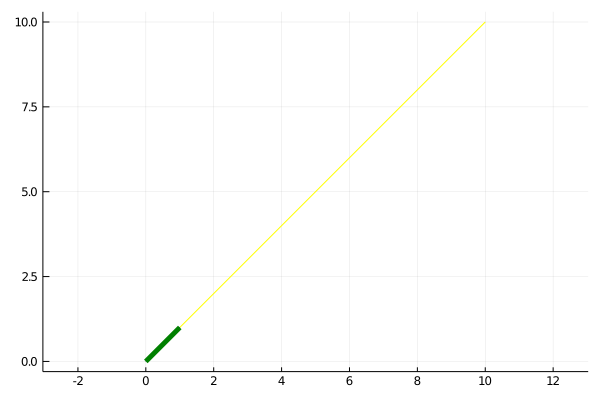

In [73]:
using Plots
v = [10,10]
u = [1,1]
xHat = v'u/(v'v)
p = xHat*v
e = u-p

plot([0,v[1]],[0,v[2]],c=:yellow,legend=false,aspectratio=1)  #v (vector projected onto)
plot!([0,u[1]],[0,u[2]],c=:blue)    #u (vector being projected)
plot!([0,p[1]],[0,p[2]],lw=5,c=:green)  #p (actual projection)
plot!([p[1],p[1]+e[1]],[p[2],p[2]+e[2]],c=:red) #the error 

In [74]:
xHat

0.1

## Projecting onto a subspace

In [79]:
A = [1 2;
     3 4;
     5 6]
rank(A)

2

In [80]:
b = [3,7,11]

3-element Array{Int64,1}:
  3
  7
 11

In [78]:
A*[1,1]

3-element Array{Int64,1}:
  3
  7
 11

In [ ]:
b = [2,4,19]

Want to "solve"
$$
A x = b
$$
but maybe $b$ is not in the column space of $A$.

We are looking for the combination $p = A \hat{x}$ that is closest to $b$.

If $A$ is $n \times 1$ we already found the answer...

$$
\hat{x} = \frac{a^T b}{a^T a}
$$

Now we have
$$
a_1^T(b-A \hat{x}) = 0
$$
$$
\vdots
$$
$$
a_n^T(b-A \hat{x}) = 0
$$


Or
$$
A^T(b-A\hat{x}) = 0
$$

or,
$$
A^TA \hat{x} = A^T b
$$

Now $A^T A$ is invertible if and only if the columns of $A$ are linearly independent.

$$
\hat{x} = (A^TA)^{-1}A^Tb
$$

$$
p = A \hat{x} = A (A^T A)^{-1} A^T b.
$$

So the **projection matrix** is $P = A (A^T A)^{-1} A^T$

$$
p = P b
$$

$$
A^\dagger = (A^TA)^{-1} A^T
$$

$$
A = v
$$
$$
b = u
$$

$$
Ax = b 
\qquad
\text{is like}
\qquad
v x = u
$$

$$
P = v(v^Tv)^{-1}v^Tu = \frac{v^Tu}{v^Tv} v
$$

---
Observe that $A^\dagger$ is a left inverse and the inverse if $A$ is square (and full rank)

In [81]:
A

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [82]:
b

3-element Array{Int64,1}:
  3
  7
 11

In [83]:
P = A*inv(A'A)*A'

3×3 Array{Float64,2}:
  0.833333  0.333333  -0.166667
  0.333333  0.333333   0.333333
 -0.166667  0.333333   0.833333

In [84]:
P*P

3×3 Array{Float64,2}:
  0.833333  0.333333  -0.166667
  0.333333  0.333333   0.333333
 -0.166667  0.333333   0.833333

In [87]:
p = P*b #in the column space of A

3-element Array{Float64,1}:
  3.0000000000000266
  6.999999999999994
 11.00000000000005

In [89]:
x = A \ p #solving 3 equations 2 unkonns

2-element Array{Float64,1}:
 0.9999999999999958
 1.0000000000000093

In [90]:
A*x

3-element Array{Float64,1}:
  3.000000000000014
  7.000000000000025
 11.000000000000036

In [92]:
b = [2,24,3] #using my "luck" so that it isn't in the col space of A

3-element Array{Int64,1}:
  2
 24
  3

In [95]:
p = P*b

3-element Array{Float64,1}:
  9.166666666666686
  9.666666666666657
 10.166666666666735

In [97]:
x = A \ p

2-element Array{Float64,1}:
 -8.666666666666666
  8.916666666666675

In [98]:
A*x

3-element Array{Float64,1}:
  9.166666666666684
  9.6666666666667
 10.166666666666721

In [99]:
P = A*inv(A'A)*A'

3×3 Array{Float64,2}:
  0.833333  0.333333  -0.166667
  0.333333  0.333333   0.333333
 -0.166667  0.333333   0.833333

In [100]:
Adag = inv(A'A)*A'

2×3 Array{Float64,2}:
 -1.33333  -0.333333   0.666667
  1.08333   0.333333  -0.416667

In [101]:
A*Adag

3×3 Array{Float64,2}:
  0.833333  0.333333  -0.166667
  0.333333  0.333333   0.333333
 -0.166667  0.333333   0.833333

In [102]:
pinv(A)

2×3 Array{Float64,2}:
 -1.33333  -0.333333   0.666667
  1.08333   0.333333  -0.416667

## Least Squares...

$$
A x = b
$$

$$
Ax - b = 0
$$

$$
f(x) = ||Ax - b||^2 
$$

xHat = [0.6081575832803787, 0.42314686675129726]


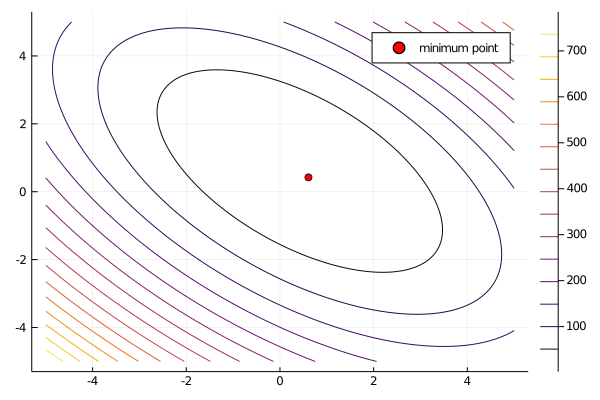

In [111]:
using Plots, Random
Random.seed!(0)
A = rand(25,2)
b = rand(25)
x1Grid = -5:0.1:5
x2Grid = -5:0.1:5
L(x1,x2) = norm(A*[x1,x2]-b)^2 #Loss (how much we loose for every [x1,x2])
z = [L(x1,x2) for x1 in x1Grid, x2 in x2Grid]
contour(x1Grid,x2Grid,z)
xHat = pinv(A)*b
@show xHat
scatter!([xHat[1]],[xHat[2]],c=:red,label="minimum point")

In [108]:
xHat

2-element Array{Float64,1}:
 0.6081575832803787
 0.42314686675129726

$$
\begin{aligned} \nabla f(x)_{k} &=\frac{\partial f}{\partial x_{k}}(x) \\ &=\sum_{i=1}^{m} 2\left(\sum_{j=1}^{n} A_{i j} x_{j}-b_{i}\right)\left(A_{i k}\right) \\ &=\sum_{i=1}^{m} 2\left(A^{T}\right)_{k i}(A x-b)_{i} \\ &=\left(2 A^{T}(A x-b)\right)_{k} \end{aligned}
$$


## Now if $A = QR$?
**complete...**

## Least Squares Data Fitting

From [SWJ] - Listing 8.2:

In [78]:
using DataFrames, GLM, Statistics, LinearAlgebra, CSV
data = CSV.read("L1L2data.csv")
xVals, yVals = data[:,1], data[:,2]
n = length(xVals)
A = [ones(n) xVals]

# Approach A
xBar, yBar = mean(xVals),mean(yVals)
sXX, sXY = ones(n)'*(xVals.-xBar).^2 , dot(xVals.-xBar,yVals.-yBar)
b1A = sXY/sXX
b0A = yBar - b1A*xBar

# Approach B
b1B = cor(xVals,yVals)*(std(yVals)/std(xVals))
b0B = yBar - b1B*xBar

# Approach C
b0C, b1C = A'A \ A'yVals

# Approach D
Adag = inv(A'*A)*A'
b0D, b1D = Adag*yVals

# Approach E
b0E, b1E = pinv(A)*yVals

# Approach F
b0F, b1F = A\yVals

# Approach G
F = qr(A)
Q, R = F.Q, F.R
b0G, b1G = (inv(R)*Q')*yVals

# Approach H
F = svd(A)
V, Sp, Us = F.V, Diagonal(1 ./ F.S), F.U'
b0H, b1H = (V*Sp*Us)*yVals

# Approach I
eta, eps = 0.002, 10^-6.
b, bPrev = [0,0], [1,1]
while norm(bPrev-b) >= eps
    global bPrev = b
    global b = b - eta*2*A'*(A*b - yVals)
end
b0I, b1I = b[1], b[2]

# Approach J
modelJ = lm(@formula(Y ~ X), data)
b0J, b1J = coef(modelJ)

# Approach K
modelK = glm(@formula(Y ~ X), data, Normal())
b0K, b1K = coef(modelK)
println(round.([b0A,b0B,b0C,b0D,b0E,b0F,b0G,b0H,b0I,b0J,b0K],digits=3))
println(round.([b1A,b1B,b1C,b1D,b1E,b1F,b1G,b1H,b1I,b1J,b1K],digits=3))

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1260


[0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.944, 0.945, 0.945]
[0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.717, 0.716, 0.716]
